In [1]:
## Second step goal:
##  Use paper_info to get the subject of each paper
import re
import numpy as np
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import json
import os
import math

In [2]:
out_dir = "..\\data\\by_year"
paper_info = pd.read_csv(out_dir+'\\paper_info_1990.csv',index_col = 'id')
paper_info.head()

,year,refereneces,issn,subjects
id,,,,
53e99784b7602d9701f3e13e,2011,"['53e99b4ab7602d97023ea8fd', '53e997f8b7602d97...",15734919,"[1308, 1312, 1307]"
53e99784b7602d9701f3e4f2,2002,"['53e9a611b7602d9702f42159', '53e9b316b7602d97...",10761551,"[2716, 1311, 1313, 1312]"
53e9978db7602d9701f4f415,2005,"['53e9aa41b7602d97033af1b3', '53e9b1b0b7602d97...",12138118,[1300]
53e99792b7602d9701f56a86,2004,"['53e9abbeb7602d970356d932', '53e9ad6cb7602d97...",00195545,[2738]
53e99792b7602d9701f5af0e,1993,"['53e99d04b7602d97025b8c26', '53e9a945b7602d97...",09368051,"[2746, 2732]"


In [3]:
paper_info.shape

(2991003, 4)

In [4]:
paper_info.columns

Index(['year', 'refereneces', 'issn', 'subjects'], dtype='object')

In [5]:
# for i in range(10):
#     sub_num = [int(s.strip(" [],")) for s in paper_info.iloc[i,3].split(",") if s.strip(" [],") != ""]
#     print(sub_num)
#     count_subject = Counter(np.array(sub_num))
#     has_ref = False
#     subject_list = []
#     ref_list = [s.strip(" [],") for s in paper_info.iloc[i,1].split("'") if s.strip(" [],") != ""]
#     print(ref_list)
#     for ref in ref_list:
#         if ref in paper_info.index:
#             has_ref = True
#             sub_num_list = [int(s.strip(" [],")) for s in paper_info.loc[ref][3].split(",") if s.strip(" [],") != ""]
#             subject_list += sub_num_list 
#             count_subject = Counter(np.array(subject_list))
#     print(has_ref)

#     print(count_subject.most_common())
#     print()
#     print()
#         ## Elements with equal counts are ordered and chose arbitrarily

In [6]:
#### Use each paper's reference to estimate the subject of the paper

def get_subject_num(i):
    ##take in index of paper_info, return 2 digits subject code
    ## if journal has only one subject, return the subject num
    sub_num = [int(s.strip(" [],")) for s in paper_info.iloc[i,3].split(",") if s.strip(" [],") != ""]
    if len(sub_num) == 1:
        return sub_num[0]//100,[]
    else:
        has_ref = False
        subject_list = []
        ref_list = [s.strip(" [],") for s in paper_info.iloc[i,1].split("'") if s.strip(" [],") != ""]
        for ref in ref_list:
            if ref in paper_info.index:
                has_ref = True
                sub_num_list = [int(s.strip(" [],")) for s in paper_info.loc[ref][3].split(",") if s.strip(" [],") != ""]
                subject_list += sub_num_list 
                count_subject = Counter(np.array(subject_list)//100)
        ## Elements with equal counts are ordered and chose arbitrarily
        if has_ref:
            return count_subject.most_common(1)[0][0],subject_list
        else:
            count_subject = Counter(np.array(sub_num)//100)
            return count_subject.most_common(1)[0][0],[]
get_subject_num(10)

(27, [])

In [90]:
paper_subject = np.zeros(paper_info.shape[0])
## ref_subject is [] if only one code is matched or no reference found
ref_subject = list()
for i in range(paper_info.shape[0]):
    if (i+2) % 155280 == 0:
        print(round((i+2)/paper_info.shape[0]*100,1),"%")
    a,b = get_subject_num(i)
    paper_subject[i] = a 
    ref_subject.append(b)

5.2 %
10.4 %
15.6 %
20.8 %
26.0 %
31.1 %
36.3 %
41.5 %
46.7 %
51.9 %
57.1 %
62.3 %
67.5 %
72.7 %
77.9 %
83.1 %
88.3 %
93.4 %
98.6 %


In [92]:
# Write
out_dir = "..\\data\\by_year"
paper_subject_match = pd.DataFrame({'id':paper_info.index,'paper_subject':paper_subject,'year':paper_info['year']})
paper_subject_match.to_csv(out_dir+'\\paper_subject_match_1990.csv',index = False)

In [97]:
###### years counts of paper with missing subject ######
# null_data = paper_subject_match[paper_subject_match.isnull().any(axis=1)]

# null_data_year =null_data['year']
# print(null_data[null_data_year>=2000].value_counts().sum())
# null_data_year[null_data_year>=2000].value_counts()

Series([], Name: year, dtype: int64)

In [4]:
# Read 
out_dir = "..\\data\\by_year"
paper_subject_match = pd.read_csv(out_dir+'\\paper_subject_match_1990.csv',index_col = 'id')
paper_subject_match.head()

,paper_subject,year
id,,
53e99784b7602d9701f3e13e,13.0,2011
53e99784b7602d9701f3e4f2,13.0,2002
53e9978db7602d9701f4f415,13.0,2005
53e99792b7602d9701f56a86,27.0,2004
53e99792b7602d9701f5af0e,27.0,1993


In [98]:
pd.crosstab(paper_subject_match['paper_subject']-10,paper_subject_match['year']).iloc[:,-5:]

year,2012,2013,2014,2015,2016
paper_subject,,,,,
0.0,6118,6911,5969,1835,0
1.0,8983,11921,12399,5031,0
2.0,513,448,357,161,0
3.0,54936,62318,55353,18538,0
4.0,133,175,78,16,0
5.0,717,878,748,294,0
6.0,5094,6194,5588,2546,0
7.0,1973,2065,1635,1730,0
8.0,31,38,16,1,0


In [ ]:
## subject includes math/cs/linguistic
# ((paper_subject_match == 17)|(paper_subject_match == 33)|(paper_subject_match == 26)).sum()

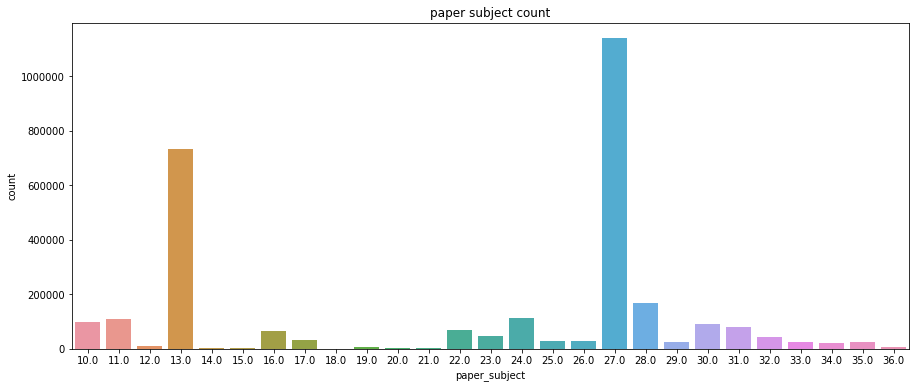

In [99]:
plt.figure(figsize=(15,6))
plt.title("paper subject count")
ax = sns.countplot(x = paper_subject_match['paper_subject'])

In [15]:
#########   subject code embedding    ###############
# del paper_subject_match
# del paper_subject
# paper_ref_subjects = pd.DataFrame({'id':paper_info.index,'ref_subject':ref_subject,'year':paper_info['year']})
# paper_ref_subjects.to_csv(out_dir+'\\ref_subjects.csv',index = False)
paper_ref_subjects = pd.read_csv(out_dir+'\\ref_subjects.csv',index_col = 'id')

In [38]:
paper_ref_subjects.head()
ref_subject = [[int(s.strip(" [],")) for s in i.split(",") if s.strip(" [],") != ""] \
               for i in paper_ref_subjects.ref_subject]
ref_subject[:4]

[[2712,
  1310,
  2730,
  1306,
  2730,
  1306,
  2734,
  2746,
  1304,
  1303,
  1311,
  1315,
  1312,
  1307,
  2715,
  2746,
  2735,
  3000,
  2736,
  1000,
  2715,
  2734,
  2737],
 [1312, 1307, 1312, 1307],
 [1300],
 [2738]]

In [39]:
# for i in range(len(ref_subject)):
#     if ref_subject[i] == []:
#         ref_subject[i] = [int(s.strip(" [],")) for s in paper_info.subjects[i].split(",") if s.strip(" [],") != ""]

In [40]:
from gensim.models import Word2Vec, KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec
from gensim.test.utils import datapath

In [41]:
w2v_string = [[str(i) for i in ref if i != 1209]  for ref in ref_subject]

In [167]:
string_len = [len(i) for i in w2v_string]
np.percentile(string_len,[5,50,95])

array([ 1.,  3., 41.])

In [174]:
model = Word2Vec(
        w2v_string,
        size=50,
        window=25,
        min_count=2,
        workers=10)

In [9]:
# wv = model.wv
wv_dir = out_dir+'code_embedding_allyear.txt'
# save vectors to file
# wv.save_word2vec_format(wv_dir, binary=False)
wv = KeyedVectors.load_word2vec_format(wv_dir, binary=False)

In [42]:
sub = []
for idx in range(len(ref_subject)):
    if (idx+2) % 155280 == 0:
        print(round((idx+2)/len(ref_subject)*100,1),"%")
    vector = np.zeros(50)
    a = w2v_string[idx]
    for i in a:
        vector += wv[i]
    sub.append(int(wv.similar_by_vector(vector)[0][0]))

5.2 %
10.4 %
15.6 %
20.8 %
26.0 %
31.1 %
36.3 %
41.5 %
46.7 %
51.9 %
57.1 %
62.3 %
67.5 %
72.7 %
77.9 %
83.1 %
88.3 %
93.4 %
98.6 %


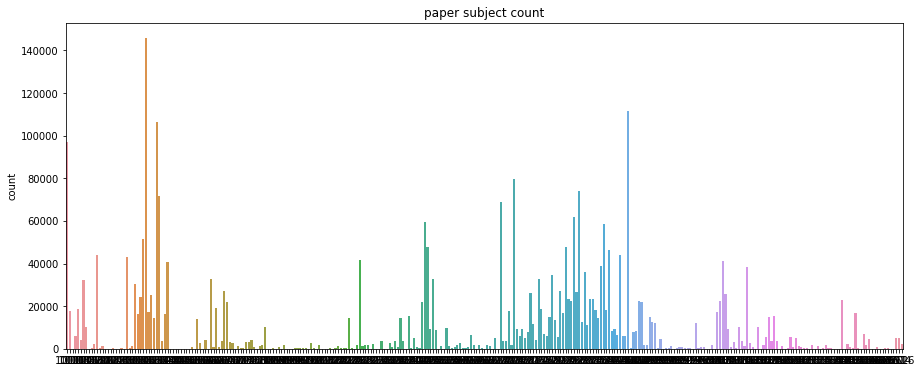

In [43]:
plt.figure(figsize=(15,6))
plt.title("paper subject count")
ax = sns.countplot(x = sub)

In [45]:
pd.crosstab(np.array(sub),paper_info['year']).iloc[:,-5:]

year,2012,2013,2014,2015,2016
row_0,,,,,
1000,6247,6973,6048,1778,0
1100,2219,3170,3410,1150,0
1101,5,19,14,0,0
1102,233,312,239,88,0
1103,1367,1638,1923,839,0
1104,311,423,315,157,0
1105,3275,4302,4012,1357,0
1106,734,984,1412,1072,0
1107,0,15,2,1,0


In [181]:
# Write
out_dir = "..\\data\\by_year"
paper_subject_match = pd.DataFrame({'id':paper_info.index,'paper_subject':sub,'year':paper_info['year']})
paper_subject_match.to_csv(out_dir+'\\paper_subject_match_1990_v3.csv',index = False)

In [46]:
# Write subfield
out_dir = "..\\data\\by_year"
paper_subject_subfield = pd.DataFrame({'id':paper_info.index,'subfield':sub,'year':paper_info['year']})
paper_subject_subfield.to_csv(out_dir+'\\paper_subject_match_subfield.csv',index = False)